In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
titanic_data = pd.read_csv("../artifacts/train.csv")

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30.0000,A23,S
1,861,0,3,"Hansen, Mr. Claus Peter",male,41,2,0,350026,14.1083,NaN,S
2,158,0,3,"Corn, Mr. Harry",male,30,0,0,SOTON/OQ 392090,8.0500,NaN,S
3,330,1,1,"Hippach, Miss. Jean Gertrude",female,16,0,1,111361,57.9792,B18,C
4,145,0,2,"Andrew, Mr. Edgardo Samuel",male,18,0,0,231945,11.5000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
566,119,0,1,"Baxter, Mr. Quigg Edmond",male,24,0,1,PC 17558,247.5208,B58 B60,C
567,748,1,2,"Sinkkonen, Miss. Anna",female,30,0,0,250648,13.0000,NaN,S
568,13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,NaN,S
569,436,1,1,"Carter, Miss. Lucile Polk",female,14,1,2,113760,120.0000,B96 B98,S


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,446.971979,0.406305,2.236427,29.267951,0.537653,0.448336,35.204071
std,260.702168,0.491573,0.838840,14.636293,0.951398,0.877822,52.756659
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,217.000000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,446.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.850000
75%,677.500000,1.000000,3.000000,38.000000,1.000000,1.000000,34.514600
max,890.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [5]:
import seaborn as sns

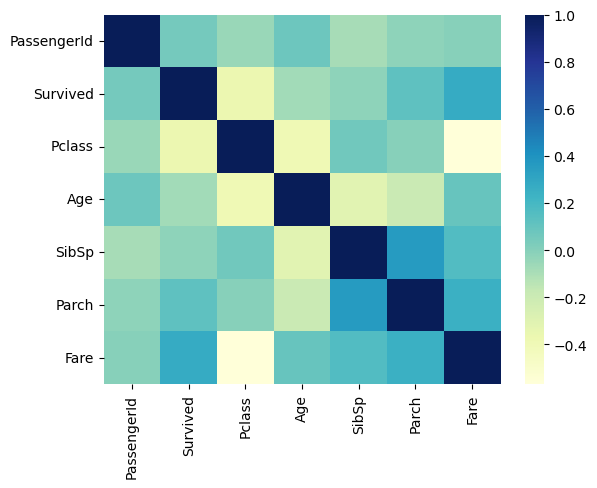

In [20]:
sns.heatmap(titanic_data.corr(numeric_only=True), cmap="YlGnBu")
plt.show()

### Observations Survival majorly depends on Pclass

In [24]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  571 non-null    int64  
 1   Survived     571 non-null    int64  
 2   Pclass       571 non-null    int64  
 3   Name         571 non-null    object 
 4   Sex          571 non-null    object 
 5   Age          571 non-null    int64  
 6   SibSp        571 non-null    int64  
 7   Parch        571 non-null    int64  
 8   Ticket       571 non-null    object 
 9   Fare         571 non-null    float64
 10  Cabin        153 non-null    object 
 11  Embarked     569 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 53.7+ KB


### Estimate missing values 

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

In [29]:
class Ageimputer(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(Xp[['Age']])
        return X

### Encoding

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
class FeatureEncoder(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        column_names = ["C","S","Q","N"]

        for i in range(len(matrix.T)):
            X[columns_name[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        column_names = ["Female","Male"]


        for i in range(len(matrix.T)):
            X[columns_name[i]] = matrix.T[i]

        return X

In [ ]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X.drop[]